In [237]:
# Michael Gallagher mhg2141
# Homework 2
# Load Shedding

In [252]:
# Initializing Spark Session
import pyspark
import sys
import re
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from operator import add
from pprint import pprint
import pandas as pd
import numpy as np
import random
from pyspark import SparkConf, SparkContext
from datetime import datetime
from operator import itemgetter
import matplotlib.pyplot as plt 
sc = pyspark.SparkContext.getOrCreate()

In [253]:
# Generate Uniform Integer Array of n values
n = 1000
s = np.random.randint(100, size = (n, 1))

(array([0.01042424, 0.01014141, 0.01005051, 0.00963636, 0.0100303 ,
        0.01019192, 0.01054545, 0.00993939, 0.0100303 , 0.0100202 ]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <a list of 10 Patch objects>)

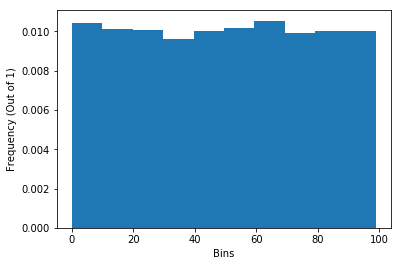

In [254]:
# Histogram of Random Integer Data
#count, bins, ignored = plt.hist(s, 30, density=True)
plt.figure()
plt.ylabel('Frequency (Out of 1)')
plt.xlabel('Bins')  
plt.hist(s, density = True, bins = 10)

In [255]:
# Average Value of Random Array

average_array = np.average(s)
average_array

49.3653

In [260]:
#Experiment 1 (Selectivity Increments of 0.01)
X=[0 for a in range(100)]
Y=[0 for a in range(100)]
i = 1
t = 1
u = 1

while i<=100:
    u=float(i)/100  
    s_1 = random.sample(s, t)
    #print(s_1)
    average1 = np.average(s_1)
    accuracy_100 = (average1-average_array)/average_array
    accuracy1 = abs(accuracy_100)
    print(1-accuracy1)
    X[i-1] = u
    Y[i-1]=(1-accuracy1)
    t=t+1
    i=i+1

0.44565717214318556
0.6887429024031051
0.8305429117213914
0.6532929000735335
0.9844972075526737
0.8352142091712194
0.7321510685209478
0.8989107733569938
0.7292571907797583
0.8791600577733752
0.7477401774488999
0.6664046742684977
0.9481867440676564
0.7581959681916535
0.9763389803498949
0.7203946901973655
0.9418621153391743
0.8712269099504668
0.9488872804005627
0.9409443475477715
0.9163946180433471
0.7789792719692872
0.9360595574131063
0.8651488663764494
0.9271816437862223
0.97935500941256
0.8260413241239855
0.9376163881454035
0.9557092909810934
0.9844972075526737
0.8224718120204978
0.925738322262804
0.9736380277914514
0.9848546865677618
0.8829631919008464
0.9488792960057189
0.8491752139496607
0.9680782591052932
0.8749493766175523
0.8214271968366443
0.9076188749745365
0.9728252339965426
0.8993229826864074
0.9632025292701922
0.934529585221468
0.9721701187922972
0.9904450498888206
0.998115410352346
0.9942537096515413
0.8591176393134448
0.990614070699737
0.9357242373146257
0.823280916635010

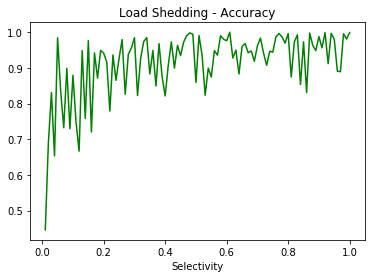

In [261]:
# Experiment 1 Plot

plt.figure()  
plt.plot(X,Y, 'g')   
#plt.ylabel('Throughput')
plt.xlabel('Selectivity')
plt.title('Load Shedding - Accuracy')
#plt.axis([0, 1, 0, 1])
plt.show()

In [244]:
# Experiment 2 (Selectivity Increments of 0.001)
X=[0 for a in range(1000)]
Y=[0 for a in range(1000)]
i = 1
t = 1
u = 1

while i<=1000:
    u=float(i)/1000  
    s_1 = random.sample(s, t)
    #print(s_1)
    average1 = np.average(s_1)
    accuracy_100 = (average1-average_array)/average_array
    accuracy1 = abs(accuracy_100)
    print(1-accuracy1)
    X[i-1] = u
    Y[i-1]=(1-accuracy1)
    t=t+1
    i=i+1

0.3840595090102382
0.6861122060176061
0.9219382203221382
0.8023407416391255
0.8974864315818198
0.8354978792503429
0.3857949959644874
0.8452947656731653
0.9657636776280845
0.8004608714108123
0.9635906072642375
0.8175009854158455
0.9115722416713896
0.8215408294241563
0.9003769847285811
0.8857220824110852
0.8882487897072051
0.9949611841610265
0.9649362179287703
0.8722193586206199
0.8863236793863518
0.8498924541494506
0.9834384223854842
0.8312867004234762
0.9019940773980979
0.9344929753649927
0.9904692600790355
0.9979800779958446
0.8991592860675269
0.920590643097541
0.9024420381496939
0.7682301931415056
0.8110693668439036
0.9518623616330496
0.9910496808407727
0.9488897648140848
0.9910155751700883
0.9782346773820333
0.9899509611464979
0.9475152360449957
0.8455225390918595
0.8916177327686984
0.957821381302695
0.9247748703799157
0.9129543721581561
0.9168115678372571
0.9918975485778293
0.9942593210232155
0.8445212838478225
0.9218034625996785
0.8220589672049247
0.954720627805131
0.9954193180407

0.9730914493768463
0.9809220924454876
0.9447502376542821
0.9942064242418992
0.964784481859806
0.9877797968540417
0.967242068535176
0.9688210840193752
0.978035093417292
0.992906598306804
0.9861049592750751
0.9767343383667934
0.9856624521188968
0.9723867541898701
0.998367739027034
0.9934692502297051
0.9893492177338313
0.9589965939985649
0.9694227092891675
0.9872381451691212
0.9908524573940868
0.9695178988278342
0.9681228220081537
0.9992649983279237
0.9864074888526196
0.9639823973886742
0.9412345139137901
0.9971182903287751
0.989428619320571
0.9714835342278161
0.9857018860427816
0.9870885571044952
0.9911347438549498
0.9726649696580785
0.9687247373204635
0.9764943851572853
0.9829942554433646
0.9946659265357909
0.9447013147090709
0.997940873065108
0.9759135377943329
0.970904664134767
0.993915303074104
0.9983454381100919
0.9811162126754375
0.9844481703521112
0.9883968846611568
0.9919509824909905
0.9687058777083148
0.949309121889673
0.9810852749764102
0.9902866065395569
0.9717146326900907
0.9

0.9758793491828045
0.986705703057542
0.9889463506998228
0.9932914113347366
0.9788204124923898
0.9861025464244169
0.9941460699999342
0.9679705794596714
0.9922605660335392
0.9855270206078247
0.9737969364806999
0.9733248197748292
0.9928522841412081
0.9852778470509409
0.9829402576067408
0.9766268141649287
0.9893879427202128
0.9767204872746308
0.9739609689926398
0.9826893674052115
0.9921899412299615
0.9842870759043363
0.9926137296980153
0.9774673357422259
0.9860697148984735
0.9757589778755972
0.9863711958930272
0.981088049400108
0.9968043690640126
0.9939738117223281
0.9592292320104837
0.9939314430876787
0.9936862423045635
0.9937006952604678
0.9860383986863492
0.9885105943335487
0.9910144116440548
0.9821953643229272
0.9838058216072079
0.9990989872940056
0.9813888165619814
0.9719545050644774
0.9821791014568291
0.9976343372721164
0.9828289570039224
0.9912057314501146
0.9801159228656656
0.998673627299378
0.9987026005092128
0.9838227650154754
0.9857589524289341
0.9903507545442091
0.9874733252656

0.990781006815139
0.9726109540107742
0.9866767269160099
0.9905066005809485
0.9982686224158587
0.9828860303096224
0.9863072591241481
0.9973628128929666
0.9683570813107809
0.9832281820065082
0.9881892808704748
0.9765225294103774
0.9838830362219536
0.987908533468035
0.9873413973467132
0.9783577203214011
0.9997264364726114
0.9792641307756071
0.9936388209093115
0.9855514249026849
0.96486606883879
0.9956642441421908
0.9858187653355984
0.9996785241412927
0.995805112931221
0.9981467415564288
0.996593495371149
0.9812708680264963
0.9803809038982922
0.9908122797362057
0.9942646774590339
0.9875306444322298
0.9858808819139661
0.9952198608701472
0.9997272377489276
0.9791736334212041
0.9929456467108393
0.9888112036627638
0.9879714903589409
0.988752316807937
0.9888911465472403
0.988365190946767
0.994261600073693
0.9796597147230846
0.9998427523062918
0.9948614235421588
0.9813628069086162
0.9956914126683553
0.997433222668701
0.9868138559907564
0.9819289591762911
0.990698960742319
0.988185708715178
0.987

0.9921689609024393
0.9922639035915005
0.9941298573541381
0.9890261145505519
0.9885267486658433
0.994122991768115
0.9832164764834259
0.9956931223843628
0.9890775314638885
0.9963501203448979
0.9813294262287866
0.9854182416056159
0.9940617349076422
0.99595283013073
0.9973315673946339
0.9866618601590893
0.9912246427711583
0.993331141369954
0.9842254558853432
0.9883209024347198
0.9806036395827599
0.9951360204878544
0.9923666742372539
0.9994191456119281
0.9905078012956993
0.999152659246483
0.9790199166013387
0.9879484979765534
0.988206395219293
0.9968080048520003
0.9942470104493214
0.9953555440802613
0.9948307601963078
0.9911901601428744
0.9779637181518974
0.9849443829908481
0.9895220408489998
0.9986967397617643
0.9916545223839959
0.9999583382974795
0.9807500641934924
0.9819176918825817
0.9971286214917849
0.9814903077136732
0.9898369934540493
0.9999474095883172
0.9724692235737717
0.985239152668885
0.9822462760361174
0.9987543180039002
0.9981481917499253
0.9810209220911286
0.9848940510498292


0.9852665151269069
0.982010090750672
0.9993861295144518
0.9909701017885257
0.9912984581390625
0.9968109532849257
0.9852243394426966
0.9957824752668564
0.9995020160624852
0.9992449078220678
0.9989215349877549
0.9908773793805621
0.9997182565395241
0.9981633907424228
0.9950835068384465
0.9920427317516866
0.9953903047975188
0.9991244730579663
0.9810931258568583
0.9978645269338773
0.9923180323713964
0.9878036373106567
0.987905652368906
0.9845102223394091
0.9971217582442423
0.9955324905168941
0.9858576450084298
0.9961247501549761
0.987883213914636
0.9969020457310817
0.9904615153823423
0.9970510703343068
0.9997489389338415
0.9890695357931808
0.97672800893354
0.9981987234127829
0.9919287851180247
0.9760163862094946
0.9938570476027871
0.9949534660784114
0.9818823128406184
0.9979855867052709
0.9979283158762337
0.9781352217375324
0.995425858642929
0.9997357786084629
0.9839673128671506
0.9980812067450939
0.9844082392286776
0.9979438311487994
0.9927833781012065
0.9944182606117778
0.9862066971905196

0.9941720941856579
0.9961971921841837
0.9917163288361542
0.9993502114982258
0.9956242424769184
0.9950299833935077
0.9880731728176506
0.9958376165097337
0.9966070353435085
0.9909214077004463
0.9958577720600797
0.9897224178966814
0.9956505461545493
0.9961070379881178
0.9966030598599611
0.992904720558815
0.9986643229835322
0.9934486790467101
0.9843846572074634
0.9986011154294333
0.9918141872009296
0.9844689826247182
0.9936473000453311
0.9929976220623172
0.9989120188609644
0.9963428623799636
0.9921289356598693
0.992683640574
0.9862732244254593
0.9877845427475607
0.9764070187910387
0.9964994657144568
0.9921058866789382
0.997759107499956
0.9935623125341878
0.9996942173226318
0.9962900357594907
0.9957005654065955
0.9980238596714751
0.988303040664251
0.9893565742091892
0.9991811362771158
0.9912520213370589
0.9927378717046995
0.9858791162424222
0.9879239425486824
0.9955578925531461
0.9834920279544518
0.9998539187336157
0.9944689392856518
0.9971480994881886
0.9968835877509507
0.9979108761182082


0.9896833659857883
0.9857469069672613
0.9970473620453912
0.9909484756301989
0.9961431681820302
0.9930851429036835
0.9984704998500821
0.9988846876102371
0.9973887078259761
0.9848956622339301
0.9889771140936898
0.9925315255951619
0.9960092997801577
0.9901576381233144
0.9919944934126841
0.9996928565394518
0.9997017363687851
0.9983074439643533
0.9813282712261782
0.9999555466190916
0.9971860783375102
0.9904233068914959
0.9895676849756471
0.9922374528588251
0.9970535981565924
0.9917326223335352
0.999124881667787
0.9875795670879495
0.9858830641927143
0.9989169301770924
0.9879196348029052
0.9865734311244807
0.9810094970123153
0.9937093990302762
0.9953509844812786
0.9919568205590609
0.99424430663351
0.989968950591343
0.9728223247326045
0.9945382803670477
0.9941448207610978
0.9996952158431605
0.9982076651905557
0.997679976076299
0.9956802179386196
0.9914679562923654
0.9933153249257747
0.9879885110583607
0.9953253150322313
0.9838006391214568
0.994804827728071
0.9972811889066703
0.997216636182477


0.9909914974533094
0.9986791431262836
0.9934987501434466
0.9996526356225138
0.994090532884001
0.9968646048893649
0.9993574520721457
0.9981436271912445
0.9998428996106643
0.9938175195158797
0.9985455001150948
0.998323621931607
0.9991993145323851
0.9883015506215773
0.9931069333190031
0.991234905308434
0.9847175054044766
0.9841018047521445
0.9938225969322771
0.9961965482077753
0.9897866415756482
0.9994174580518906
0.9930034011134975
0.9989802741291237
0.9944387096076831
0.9992636463925072
0.9972088416942524
0.9935377951233849
0.9957889092943805
0.9875213290119003
0.996807009263379
0.9968508476643865
0.9985699598525256
0.9909973234978678
0.9914743591139561
0.997087038264605
0.9970447875002634
0.9980264545556444
0.9974512280707732
0.9954225443094026
0.9954111650212962
0.9943863214776831
0.9990157366876659
0.9936120407844972
0.9978137044836466
0.9932737596373634
0.9985668698412627
0.9898028165215718
0.9937319752061574
0.996593538358948
0.9933410354551158
0.9989105727762505
0.9873967840069535

0.998720807051999
0.9976223489717213
0.9987973788951482
0.9942730531280856
0.9988816153964978
0.9952603912444626
0.9848983456424288
0.9902040129782662
0.9980636700656544
0.9975268803829979
0.9957066221615197
0.9930051055570582
0.9904098753199854
0.9950989368378391
0.9890035757925127
0.9966593505822671
0.9843946655229087
0.9883314945976716
0.9980621917062128
0.995670336540263
0.9927947655534702
0.9920192474144992
0.9973159474905672
0.9967263260307982
0.9897134277945334
0.9990867097487226
0.9986840471251277
0.9933556248100985
0.9866179823822696
0.990437406047387
0.993876874330296
0.9971146594663105
0.9954260401965082
0.9996122351082702
0.9926783533930257
0.9944638207144482
0.9920685425573168
0.9934127321291671
0.9985256586291444
0.9996055249176973
0.9969559696701524
0.9932285560575553
0.9835910126717291
0.9822858131091962
0.9951360436692666
0.986701303572843
0.9987650651508445
0.9913565762304871
0.9997524223329315
0.9986688839355611
0.9902183851628993
0.9980428252072435
0.998473234994225

0.9931920855184682
0.9979113099408603
0.9924483066804299
0.9982178982553574
0.9984692902377804
0.9967930253549246
0.9894660391345546
0.9995171662856545
0.9964322478594645
0.9977153532307695
0.9995446956295254
0.9919187131479017
0.9997758486638426
0.9952463564865266
0.9924252833200409
0.997263697549216
0.9978270069029974
0.9894765696741755
0.9904501712396263
0.9968984355267205
0.999027078179548
0.9972429640387012
0.9921805454215241
0.9942620537710206
0.9993454351522978
0.9931533407194743
0.9934335996846141
0.9930821344403896
0.9947316017194353
0.9960642224689742
0.9947912702572312
0.9930057628125409
0.9850550345713969
0.9998731668176848
0.9957699869677961
0.9979242056426334
0.9988429637674624
0.990395111749987
0.9905443982174387
0.9930065168542226
0.9992051833089606
0.9874398867213579
0.9932100214577532
0.9975870351611238
0.9956353923486515
0.9973984322529216
0.993445338875527
0.9903788186545658
0.9960508273960438
0.995246804875121
0.9972012300093287
0.9989289410487261
0.996025757391754

0.9945298380458018
0.9951765503841357
0.9943527096418524
0.9982996658093797
0.9972895728404373
0.9917807031309124
0.9887184707714877
0.9993731208413702
0.9939164919223176
0.9967564388109961
0.9954071788713029
0.996125601267128
0.9985873529650352
0.9946420426688605
0.999662297197968
0.9992517749596199
0.9944597933086861
0.9929425496156677
0.9956314866167565
0.9990847318244739
0.9932403757530108
0.9891579608728233
0.9994503585137897
0.9923391198056335
0.9986647654950496
0.9963557998781286
0.9958379231721735
0.9963267479555824
0.9968990904510414
0.9972310438754095
0.9951699353921606
0.9964648484132062
0.9936860978754389
0.9972259987093612
0.9934299314737755
0.9943111328924619
0.992848065499006
0.9950130945604829
0.9955132572009209
0.9985215801075125
0.9955754832303227
0.998032910603014
0.997282091069457
0.9920612126930869
0.9972377351012713
0.9917822261633026
0.9952462132105164
0.9950986579306057
0.9939230583938901
0.9929165525466183
0.9937033476949159
0.992776600893042
0.9953210640935657

0.9930169069383828
0.9994158887788479
0.9904753374336918
0.9982327175815234
0.992854722867919
0.9968712398557149
0.9986220581278504
0.9978833748144688
0.9972213189969703
0.9991422122735435
0.9886969451870142
0.9978051147274982
0.9975182684420222
0.9945294023112847
0.9976692287147906
0.9963937764829666
0.995995997250163
0.9975504779789895
0.9977469772883195
0.9904657815627097
0.997185119389163
0.9993642434108433
0.9996721416928361
0.9999799340768815
0.9999104843560951
0.9994812470547049
0.988589646951224
0.9963131819051727
0.9971906835318041
0.9996721973836896
0.9916254174539691
0.9986723639329675
0.9979591424211054
0.995612031186812
0.998803143944851
0.9954160040011458
0.994780443564385
0.9987806385410065
0.9948379066562035
0.9979662116549981
0.9929543754855074
0.9967260994832298
0.9970454554140176
0.9957244648340846
0.9999422476799787
0.9941643043620028
0.9988725743752783
0.9970646697400046
0.9998734569606218
0.9961135807090258
0.9968392267098563
0.9915520728583413
0.9926825657397182


0.9963272054981424
0.9984341802891834
0.9993530317167478
0.9918719065652148
0.9885097562634255
0.99622444029936
0.9985476002409056
0.9975365688356033
0.9933403925772436
0.9969481744809204
0.9877415325290061
0.9942119703343728
0.9935778095577633
0.9982377732633941
0.9952088245608425
0.9937153434127584
0.9907426730026221
0.9990731549588198
0.9955848829724109
0.9980235332994043
0.9966784100526874
0.9912864629501359
0.9955307065243452
0.9984099987991278
0.9956320337592696
0.9956633051791804
0.9958139830842921
0.9967552173343246
0.9991093326533284
0.9992631369883531
0.9987772155868155
0.998227473714327
0.9970760212846501
0.9994187203074617
0.9889349431624951
0.9976223426516235
0.9963063091946436
0.9950603444232764
0.9985353956257885
0.9956128567035142
0.9958123737186754
0.9979841818109806
0.9969982073472489
0.9959314540682273
0.9956602537025242
0.9991922355689321
0.9952500170957909
0.9999005850850492
0.9974411389967132
0.9926108917165994
0.9994673152836424
0.9960884513686254
0.9931354670095

0.99569460432729
0.993766544974751
0.9982750290005222
0.9984148805070856
0.9985749915610851
0.993725958833977
0.9992953251234505
0.999847423482916
0.9949547988133115
0.9974823834066114
0.9982098817409517
0.9982874653650256
0.9998702586624758
0.998433223865251
0.9995674521884992
0.9933870064881763
0.9985444519517346
0.9965604098199016
0.9994163604382742
0.9997530545611361
0.9983415214123216
0.9953214074922467
0.9989537447251674
0.9998132152945014
0.9915469507167549
0.9951247371281611
0.9973288122549816
0.9997617098617193
0.9936537481049375
0.9964811108307411
0.9945988607410304
0.9992769412233988
0.9975960318337301
0.9940913258750238
0.9949946610136274
0.9966177066857488
0.9941995640756351
0.998100578658735
0.9991202120370306
0.9982858763511009
0.9967101932354246
0.9992698463016142
0.9929068160234835
0.99883695640593
0.9938507382761943
0.995456499003996
0.9958016237582745
0.9991683080942112
0.9968276748296577
0.9949605161175878
0.9984555337275598
0.9947025819678799
0.994888082386857
0.99

0.9975385021305095
0.998647868691371
0.9998767943591632
0.9965650407958184
0.9992209509592932
0.9984048664816768
0.9987953689733957
0.9949805377710451
0.9994625649252955
0.9958809891391185
0.9958325304558705
0.9974672013825869
0.9999962473310631
0.9979083399612445
0.9972370032295917
0.9985467876100976
0.9993233100254096
0.9936890572827736
0.9985178940560803
0.999412580210493
0.9997878528831025
0.99379950135697
0.995863155469548
0.9975553646865293
0.9989215754255856
0.9971285765251676
0.999920550389817
0.996022900467799
0.9991905130016435
0.99633591659418
0.9977283618079564
0.9990223523301623
0.9972580408517131
0.9853889881784731
0.9976529896110262
0.9971534466062433
0.9994782273487466
0.9999918371178322
0.9970206889759772
0.9948619965014552
0.9926270405728017
0.9988591256465443
0.9932813190642298
0.997029890862619
0.9957868071464268
0.9992376357501189
0.9951593480602181
0.9977112236022079
0.9982319678668564
0.9979909581197625
0.9963835954494427
0.995741009253524
0.9987937318209508
0.99

0.9959279359551293
0.9963437710977556
0.9989594771723246
0.9959535256493679
0.9987196784097438
0.9933142244071725
0.9982611917539349
0.9948716539951896
0.9992011523263212
0.9986982302648681
0.998193069900451
0.9969572044051801
0.9984306924615292
0.9986027808528604
0.9987028511836951
0.9995918248289483
0.9998489705268405
0.9982195113715004
0.9950118048950466
0.9921994192371938
0.9972571152320506
0.9956704820546057
0.9919852525025643
0.9998978347604144
0.9980249541352877
0.9996710795393323
0.9981741371005153
0.9984472152910078
0.9974962030244521
0.9980405068997039
0.997286947458907
0.9941582527313706
0.9980716353410608
0.9987732925818322
0.9998479642035172
0.9994542897064795
0.9995023200621762
0.9979648917456144
0.997389790126331
0.99470966475265
0.9978153721450265
0.9969191170647462
0.9964980348126499
0.9947446134650083
0.9977868539927164
0.9993469161843418
0.9925901678973938
0.9936064113647641
0.9935980382353967
0.9966092450443509
0.9974646264858641
0.9955067584048432
0.996238149588612

0.9982235986876291
0.9938076048843132
0.9963986687755527
0.998961567728995
0.9974684283197589
0.9978027279575635
0.9965715221459008
0.9992034576506957
0.998117399013253
0.9946404523854525
0.9976936860542673
0.9943988259881029
0.9994339823151438
0.9999101890718862
0.9986377932555329
0.9950979386670714
0.9978581172716732
0.9986297099844926
0.9986691064657991
0.9930654761966531
0.9958622520580113
0.9991965705854795
0.9953202363161248
0.9992698328233269
0.9957590035129026
0.9935914294229291
0.9972180380845884
0.9974534396895464
0.9947311154487217
0.9984667833342746
0.9978804323619626
0.9983944610426329
0.9970296571540508
0.9968580719675475
0.9966614192762845
0.9998919230847125
0.9988037540910756
0.9998870728445064
0.9987412542830011
0.9984292506868989
0.9966964719769191
0.9948490558232665
0.9939561036050784
0.9969755548810061
0.9976017221635667
0.9985675697945419
0.9998314283188886
0.9970134639397892
0.9974486673343591
0.999535443011428
0.9985537210136083
0.996500986168815
0.99821630248985

0.9985596602929152
0.998223884931082
0.994159563739011
0.9969957862504522
0.9973776046049444
0.998900649367359
0.9978507286024626
0.9988219440726962
0.9992889619360774
0.9967454290527626
0.9985272505217718
0.9974077069512535
0.9991019031240524
0.9970599439189857
0.9996679186401373
0.9972307168709506
0.9985278856252173
0.9994883310358191
0.9984946049100494
0.9987202683747909
0.9979439608818605
0.9991785899944957
0.9952807903618158
0.9976673061530965
0.9979565788900293
0.9963998711665322
0.9996906542813118
0.9993428845180756
0.9971531350908157
0.9987581942451847
0.9996514186179501
0.9992547886831974
0.9987766997386245
0.9948582530542939
0.999886743746044
0.9984499647731172
0.9981585919047026
0.9999119806100839
0.9983376640078923
0.9944148976556466
0.9987450815984283
0.9991890173674344
0.9966068661272779
0.9980276507385345
0.9950808948098759
0.9971980302384439
0.9990578654229577
0.99991038421255
0.9967411971684061
0.999820862870494
0.9995339153429053
0.9965005632697738
0.9996719753562168


0.998455415210952
0.9968964459667985
0.9986123212415814
0.9999125302966092
0.9989777683628741
0.9995723905641359
0.9995780404482012
0.9984119813204356
0.999649252237405
0.9985844128746194
0.9997161727774615
0.9984871912771587
0.9977651132397727
0.9975695199094768
0.9971724226123226
0.9996986620631153
0.9959621406148292
0.9976365175990407
0.9984913208990813
0.9978295575838902
0.9975707446246911
0.9972414330137865
0.9984736380126249
0.9995404192318402
0.9991049620088635
0.9993617113848962
0.9995199493599235
0.9976928943497032
0.9984281054323619
0.9999653681997847
0.9961461423809723
0.9991379856796051
0.9982441779917846
0.9990857697895825
0.9980860991536792
0.9976898761679138
0.9987800917115458
0.9983433033323814
0.9991709576932082
0.9976166434705847
0.9982435703744251
0.9982675373052599
0.9998424016412336
0.9995130720436397
0.9989318855551053
0.9982357348817054
0.9986792682647546
0.9984413180118856
0.9998548045700194
0.9974507657873192
0.9985168312752472
0.9996595826431628
0.998519662966

0.9972911582302338
0.9988314228323437
0.999460600058743
0.99724112911588
0.9999050337817961
0.9978910750848229
0.9987486839414489
0.9979002763079403
0.9994480756776248
0.9972064273408119
0.9991313323713452
0.9980243170310178
0.9988664656407993
0.9997440267936234
0.999474662581223
0.9979917776747323
0.9982551820072926
0.9988900016743766
0.9991821181523751
0.999829993503462
0.999775021810029
0.9994766794770322
0.9985947803247296
0.9995154288445789
0.9986877873472843
0.9997267668408341
0.9998415305153535
0.9979511764341099
0.998530739077294
0.9997843693521348
0.9991592439300782
0.9995863515248674
0.9992358264746838
0.9989689582255731
0.9977720603824347
0.9989383936737757
0.9990088856231645
0.9999192152467387
0.997654332007249
0.9999430016968176
0.9994433161924348
0.9981678591516153
0.9999310788605623
0.9990467982623958
0.9992783586454401
0.9984668287082806
0.998528946178965
0.9984971023647701
0.999994076788166
0.9996602149094984
0.9992779017319074
0.9997806394041739
0.9986461743448987
0.9

0.998461306551144
0.9990278440920489
0.999131962433306
0.9995818736838609
0.999373066830295
0.9992572128818842
0.9998815855783353
0.9989938766771287
0.9998096675755869
0.9990044186962564
0.9986271281050144
0.9997941242597257
0.9993349718735808
0.9992333101266964
0.9999266306501465
0.9992039288970339
0.9993303765703311
0.9995924606639053
0.9986973699908388
0.9995492699435309
0.9995024248843569
0.9988732642186069
0.9994208290729463
0.9987354959811385
0.999213243787669
0.9994013064361383
0.999646831881421
0.9993378897514793
0.9996326483269448
0.9993233146304437
0.9991360688160872
0.9999062634697
0.9999975443555449
0.9998281839038639
0.9997081043903371
0.9998404122233806
0.9992395218802435
0.9990704240267773
0.999816154161973
0.9990691052476626
0.999826561807509
0.9999877934765398
0.9997426525937738
0.9997888226218472
0.9998555638688607
0.9993173288833934
0.9995151109592788
0.9991026889829717
0.9996468551965795
0.9998726023220109
0.9994843448017411
0.999061343090426
0.999861200843058
0.999

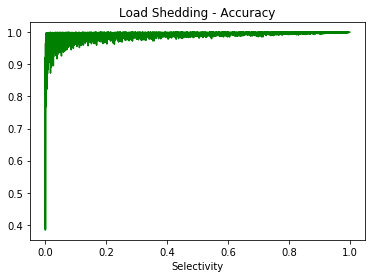

In [245]:
# Experiment 2 Plot

plt.figure()  
plt.plot(X,Y, 'g')   
#plt.ylabel('Throughput')
plt.xlabel('Selectivity')
plt.title('Load Shedding - Accuracy')
#plt.axis([0, 1, 0, 1])
plt.show()

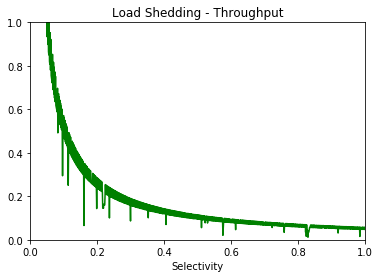

In [250]:
# Load Shedding Throughput Graph

input=sc.textFile("gs://streamprocessing/hw2/data.txt")
input_map = input.map(lambda x:int(x))

X=[0 for a in range(1000)]
Y=[0 for a in range(1000)]
i=1

while i<=1000:
    s=float(i)/1000    
    a1=datetime.now()
    a_operator = input_map.filter(lambda x: x % 2==1)
    a2=datetime.now()
    #microseconds
    micro1=0.000001*(a2-a1).microseconds
    #seconds
    second1=(a2-a1).seconds
    #overall time passing A
    cost_a=second1+micro1
    throughA=1/(cost_a*s)
    throughA2=throughA/3500000
    X[i-1] = s
    Y[i-1]=throughA2
    i=i+1
     
plt.figure()  
plt.plot(X,Y, 'g')   
plt.xlabel('Selectivity')
plt.title('Load Shedding - Throughput')
plt.axis([0, 1, 0, 1])
plt.show()